<a href="https://colab.research.google.com/github/Araslt/kulturos-finansavimo-apzvalga/blob/main/k_taryba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*

## 1 UŽDUOTIS

### 0

* Remdamiesi pateiktais duomenimis (failas DUOMENYS) pristatykite trumpą (iki 1 psl. arba 250 žodžių) šio tipo stipendijų finansavimo apžvalgą, rezultatus pateikite apibendrinančioje lentelėje ir iliustruokite grafiškai (ne daugiau kaip 5 grafikai). Tarpinius veiksmus išsaugokite atskirame (-uose) excel lape (-uose).
* Kokias pagrindines problemas, susijusias su edukacinių / mobilumo stipendijų finansavimu, iš pateiktų duomenų ir atliktos analizės identifikuojate?
* LKT Stebėsenos ir analizės skyrius planuoja įgyvendinti tyrimą apie edukacinių / mobilumo stipendijų poveikį menininkui ir visuomenei. Remdamiesi pateiktais duomenimis bei atlikta analize, nurodykite 3–5 aspektus ar potemes, kurias siūlytumėte įtraukti į tyrimą. Savo siūlymą argumentuokite.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pagrindiniai_duoemnys = pd.read_excel("/content/drive/MyDrive/CV/kultura/DUOMENYS.xlsx")
# pd.set_option('display.max_columns', None)
# pagrindiniai_duoemnys.head(3)

In [2]:
# Pakeiciam LT simbolius ir tarpus į "_"
def normalize_column_name(name):
    replacements = {
        'ą': 'a', 'č': 'c', 'ę': 'e', 'ė': 'e', 'į': 'i', 'š': 's', 'ų': 'u', 'ū': 'u', 'ž': 'z',
        'Ą': 'A', 'Č': 'C', 'Ę': 'E', 'Ė': 'E', 'Į': 'I', 'Š': 'S', 'Ų': 'U', 'Ū': 'U', 'Ž': 'Z'
    }
    for lith_char, repl_char in replacements.items():
        name = name.replace(lith_char, repl_char)
    name = name.replace(' ', '_')
    return name

# Nuskaitome XLSX failą
pagrindiniai_duoemnys = pd.read_excel("DUOMENYS.xlsx")

# Pakeičiame stulpelių pavadinimus
pagrindiniai_duoemnys.columns = [normalize_column_name(col) for col in pagrindiniai_duoemnys.columns]

# Parodom visus stulpelius
pd.set_option('display.max_columns', None)
pagrindiniai_duoemnys.head(3)

,Metai,Etapas,Stipendijos_rusis,Finansavimo_statusas,Kulturos_ir_meno_sritis,Pareiskejo_numeris,Lytis,Savivaldybe,Regionas,Amziaus_grupe,Veiklos_igyvendinimo_regionas,Veiklos_igyvendinimo_salis_/_salys,Igyvendinimo_vieta_(apjungta),"Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_","Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_formos_veiklos",Veiklos_pavadinimas,Prasoma_stipendijos_trukme_(men.),Prasoma_suma,Skirta_men.,Skirta_suma
0,2014,1,Edukacinė,Finansavimas neskirtas,Fotografija,Pareiškėjo Nr. 7232,Moteris,Vilniaus miesto savivaldybė,Lietuva,Iki 35,NaN,NaN,NaN,NaN,NaN,Fotografės Ulijonos Odišarijos kūrybinė veikla...,4.0,1520.0,NaN,NaN
1,2014,1,Vardinė,Finansuota,Muzika,Pareiškėjo Nr. 7139,Moteris,Vilniaus miesto savivaldybė,Lietuva,Iki 35,NaN,NaN,NaN,NaN,NaN,2014 m. vardinė valstybės stipendija,NaN,4560.0,12.0,4560.0
2,2014,1,Individuali,Finansuota,Fotografija,Pareiškėjo Nr. 6074,Vyras,Vilkaviškio rajono savivaldybė,Lietuva,51-65,NaN,NaN,NaN,NaN,NaN,Fotografijų ciklui „Lietuvos kvapai“ sukurti,24.0,9120.0,24.0,9120.0


In [3]:
pagrindiniai_duoemnys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19693 entries, 0 to 19692
Data columns (total 20 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Metai                                                                               19693 non-null  int64  
 1   Etapas                                                                              19693 non-null  int64  
 2   Stipendijos_rusis                                                                   19693 non-null  object 
 3   Finansavimo_statusas                                                                19693 non-null  object 
 4   Kulturos_ir_meno_sritis                                                             19693 non-null  object 
 5   Pareiskejo_numeris                                                                  19693 non-n

In [4]:
pagrindiniai_duoemnys['Stipendijos_rusis'].unique()

array(['Edukacinė', 'Vardinė', 'Individuali', 'Ukrainiečių', 'Mobilumo',
       'Pradedančiųjų'], dtype=object)

In [5]:
pagrindiniai_duoemnys['Stipendijos_rusis'].value_counts()

Stipendijos_rusis
Individuali      15400
Edukacinė         2933
Mobilumo           721
Pradedančiųjų      346
Ukrainiečių        281
Vardinė             12
Name: count, dtype: int64

In [6]:
pagrindiniai_duoemnys['Metai'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [7]:
# Filtruojame edukacinių/mobilumo stipendijų duomenis
edukacines_mobilumo_stipendijos = pagrindiniai_duoemnys[
    pagrindiniai_duoemnys['Stipendijos_rusis'].str.contains("edukacine|mobilumo", case=False, na=False)
]
edukacines_mobilumo_stipendijos.head(10)

,Metai,Etapas,Stipendijos_rusis,Finansavimo_statusas,Kulturos_ir_meno_sritis,Pareiskejo_numeris,Lytis,Savivaldybe,Regionas,Amziaus_grupe,Veiklos_igyvendinimo_regionas,Veiklos_igyvendinimo_salis_/_salys,Igyvendinimo_vieta_(apjungta),"Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_","Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_formos_veiklos",Veiklos_pavadinimas,Prasoma_stipendijos_trukme_(men.),Prasoma_suma,Skirta_men.,Skirta_suma
16308,2023,1,Mobilumo,Finansavimas neskirtas,Muzika,Pareiškėjo Nr. 7430,Moteris,Vilniaus miesto savivaldybė,Lietuva,Iki 35,Europa,Vokietija,Užsienis,KOMPETENCIJOS KĖLIMAS;,Kvalifikacijos kėlimas užsienyje;,Chorinio dirigavimo meistriškumo kursai,NaN,600.0,NaN,NaN
16312,2023,1,Mobilumo,Finansavimas neskirtas,Dailė,Pareiškėjo Nr. 7429,Moteris,Užsienis,Europa,35-50,Europa,Italija,Užsienis,TYRIMAI;,Dalyvavimas konferencijoje;,Kelionė į Bolonijos vaikų knygų mugę,NaN,1000.0,NaN,NaN
16314,2023,1,Mobilumo,Finansavimas neskirtas,Dizainas,Pareiškėjo Nr. 7428,Moteris,Nenurodyta,Lietuva,Iki 35,Europa,Šveicarija,Užsienis,KŪRYBA;,Iliustracijų sukūrimas;,"vizualinė komunikacija - iliustracija, tapyba",NaN,2500.0,NaN,NaN
16317,2023,1,Mobilumo,Finansuota,Muziejai,Pareiškėjo Nr. 2659,Vyras,Vilniaus miesto savivaldybė,Lietuva,35-50,Europa,Latvija,Užsienis,VIEŠINIMAS; TYRIMAI; TYRIMAI;,Straipsnio parengimas/ publikavimas; Analizė/ ...,Paveikslo „Nuėmimas nuo Kryžiaus“ iš Žemaičių ...,NaN,3565.0,NaN,885.0
16320,2023,1,Mobilumo,Finansuota,Teatras,Pareiškėjo Nr. 1831,Vyras,Kauno miesto savivaldybė,Lietuva,Iki 35,Europa,Portugalija,Užsienis,KOMPETENCIJOS KĖLIMAS; PRISTATYMAS VISUOMENEI;...,Dalyvavimas rezidencijoje užsienyje; Spektakli...,Rezidencija JA tarptautiniame teatre Lisabonoje,NaN,3320.0,NaN,3320.0
16324,2023,1,Mobilumo,Finansavimas neskirtas,Bibliotekos,Pareiškėjo Nr. 1797,Moteris,Vilniaus miesto savivaldybė,Lietuva,35-50,Europa,Latvija,Užsienis,TYRIMAI;,Dalyvavimas konferencijoje;,Dalyvavimas konferencijoje: The 13th Baltic St...,NaN,550.0,NaN,NaN
16325,2023,1,Mobilumo,Finansuota,Bibliotekos,Pareiškėjo Nr. 2811,Moteris,Vilniaus miesto savivaldybė,Lietuva,51-65,Europa,Latvija,Užsienis,TYRIMAI;,Dalyvavimas konferencijoje;,Dalyvavimas konferencijoje: The 13th Baltic St...,NaN,550.0,NaN,550.0
16328,2023,1,Mobilumo,Finansuota,Tarpdisciplininis menas,Pareiškėjo Nr. 177,Moteris,Kauno miesto savivaldybė,Lietuva,Iki 35,Europa,Estija,Užsienis,KŪRYBA; KŪRYBA; KŪRYBA; KŪRYBA;,Muzikos kūrinio sukūrimas; Objektų sukūrimas; ...,Kūrybinė rezidencija parodos parengiamiesiems ...,NaN,580.0,NaN,580.0
16331,2023,1,Mobilumo,Finansuota,Architektūra,Pareiškėjo Nr. 685,Vyras,Vilniaus miesto savivaldybė,Lietuva,35-50,Pasaulis,Jungtinės Amerikos Valstijos,Užsienis,TYRIMAI;,Analizė/ tyrimas;,Lietuvių mokyklų architektūros tyrimas Čikagos...,NaN,2799.0,NaN,2500.0
16334,2023,1,Mobilumo,Finansuota,Dailė,Pareiškėjo Nr. 1597,Moteris,Vilniaus miesto savivaldybė,Lietuva,35-50,Europa,Italija,Užsienis,PRISTATYMAS VISUOMENEI; PRISTATYMAS VISUOMENEI...,Kūrinių pristatymas viešojoje erdvėje; Paroda;...,"Dalyvavimas FIDEM kongrese, darbų siuntimas pa...",NaN,2320.0,NaN,2320.0


In [8]:
edukacines_mobilumo_stipendijos['Metai'].unique()

array([2023, 2024])

In [9]:
edukacines_mobilumo_stipendijos['Kulturos_ir_meno_sritis'].unique()

array(['Muzika', 'Dailė', 'Dizainas', 'Muziejai', 'Teatras',
       'Bibliotekos', 'Tarpdisciplininis menas', 'Architektūra',
       'Fotografija', 'Cirkas', 'Šokis', 'Literatūra',
       'Etninė kultūra ir tautodailė'], dtype=object)

In [10]:
edukacines_mobilumo_stipendijos['Finansavimo_statusas'].unique()

array(['Finansavimas neskirtas', 'Finansuota', 'Nevertinama'],
      dtype=object)

In [11]:
edukacines_mobilumo_stipendijos.columns

Index(['Metai', 'Etapas', 'Stipendijos_rusis', 'Finansavimo_statusas',
       'Kulturos_ir_meno_sritis', 'Pareiskejo_numeris', 'Lytis', 'Savivaldybe',
       'Regionas', 'Amziaus_grupe', 'Veiklos_igyvendinimo_regionas',
       'Veiklos_igyvendinimo_salis_/_salys', 'Igyvendinimo_vieta_(apjungta)',
       'Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_',
       'Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_formos_veiklos',
       'Veiklos_pavadinimas', 'Prasoma_stipendijos_trukme_(men.)',
       'Prasoma_suma', 'Skirta_men.', 'Skirta_suma'],
      dtype='object')

In [12]:
finansavimo_procentas = edukacines_mobilumo_stipendijos['Finansavimo_statusas'].value_counts(normalize=True)

for label, count in finansavimo_procentas.items():
    percentage = count * 100
    print(f"{label}: {int(finansavimo_procentas[label] * len(edukacines_mobilumo_stipendijos))} - {percentage:.2f}%")

Finansavimas neskirtas: 323 - 44.80%
Finansuota: 311 - 43.13%
Nevertinama: 87 - 12.07%


### 1.1

**Kokia dalis paraiškų buvo patvirtinta ir kokia dalis atmesta žiūrint pagal kultūros ir meno sritį?**


 *

In [25]:
paraisku_kiekis_kulturos_srityse = edukacines_mobilumo_stipendijos['Kulturos_ir_meno_sritis'].value_counts().reset_index()

# Pervadiname stulpelius, kad būtų aiškiau
paraisku_kiekis_kulturos_srityse.columns = ['Kulturos_ir_meno_sritis', 'Paraisku_kiekis']

# print(paraisku_kiekis_kulturos_srityse)
paraisku_kiekis_kulturos_srityse

,Kulturos_ir_meno_sritis,Paraisku_kiekis
0,Muzika,167
1,Tarpdisciplininis menas,122
2,Dailė,99
3,Teatras,75
4,Dizainas,48
5,Šokis,38
6,Fotografija,33
7,Bibliotekos,29
8,Literatūra,29
9,Muziejai,23


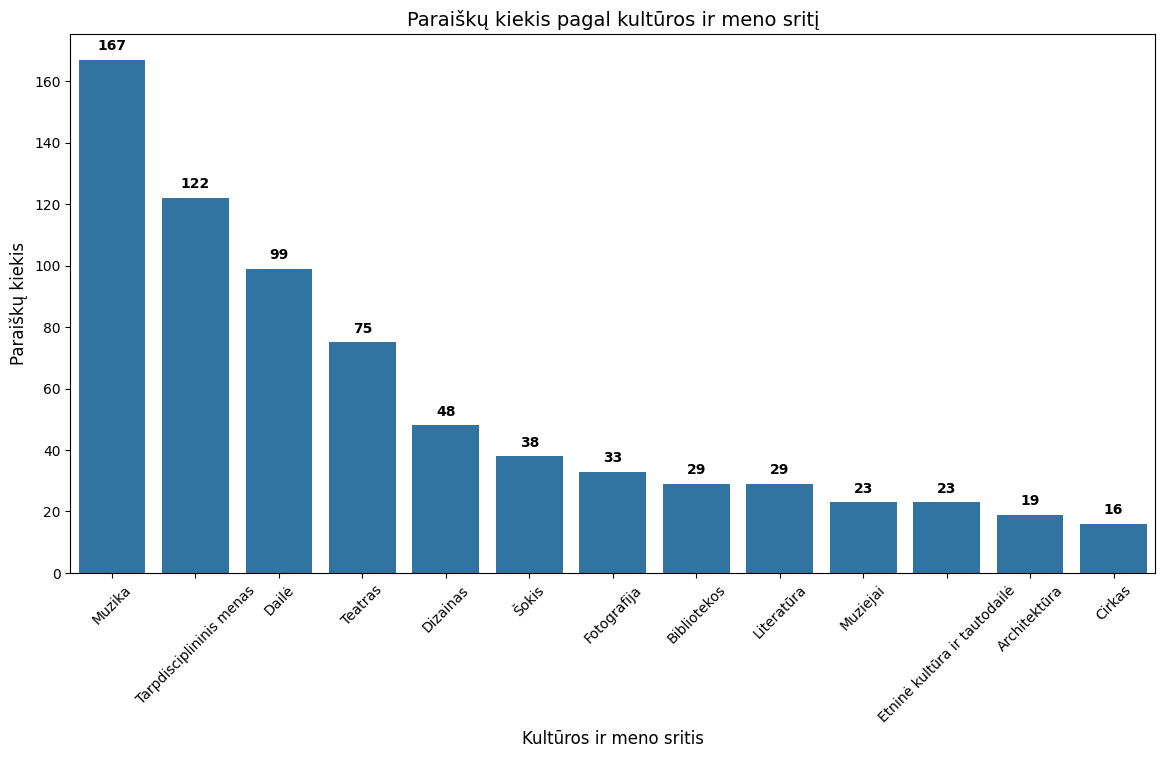

In [26]:
# Sukuriame Barplot, kad vizualizuotume kiekvienos kultūros srities paraiškų kiekį
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Kulturos_ir_meno_sritis', y='Paraisku_kiekis', data=paraisku_kiekis_kulturos_srityse)

# Pridedame skaičius ant stulpelių
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(count,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10, color='black', fontweight='bold')

# Etiketės ir ašies formatavimas
plt.title('Paraiškų kiekis pagal kultūros ir meno sritį', fontsize=14)
plt.xlabel('Kultūros ir meno sritis', fontsize=12)
plt.ylabel('Paraiškų kiekis', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [27]:
# Sukuriu kryžminę lentelę
cross_tab_kulturos_sritis = pd.crosstab(edukacines_mobilumo_stipendijos['Kulturos_ir_meno_sritis'], edukacines_mobilumo_stipendijos['Finansavimo_statusas'])

# Paverčiu NaN į 0, jei tokie stulpeliai yra
cross_tab_kulturos_sritis = cross_tab_kulturos_sritis.fillna(0)

# print(cross_tab_kulturos_sritis)
cross_tab_kulturos_sritis

Finansavimo_statusas,Finansavimas neskirtas,Finansuota,Nevertinama
Kulturos_ir_meno_sritis,,,
Architektūra,5,13,1
Bibliotekos,17,8,4
Cirkas,4,10,2
Dailė,49,37,13
Dizainas,20,24,4
Etninė kultūra ir tautodailė,9,10,4
Fotografija,14,11,8
Literatūra,14,11,4
Muziejai,11,9,3


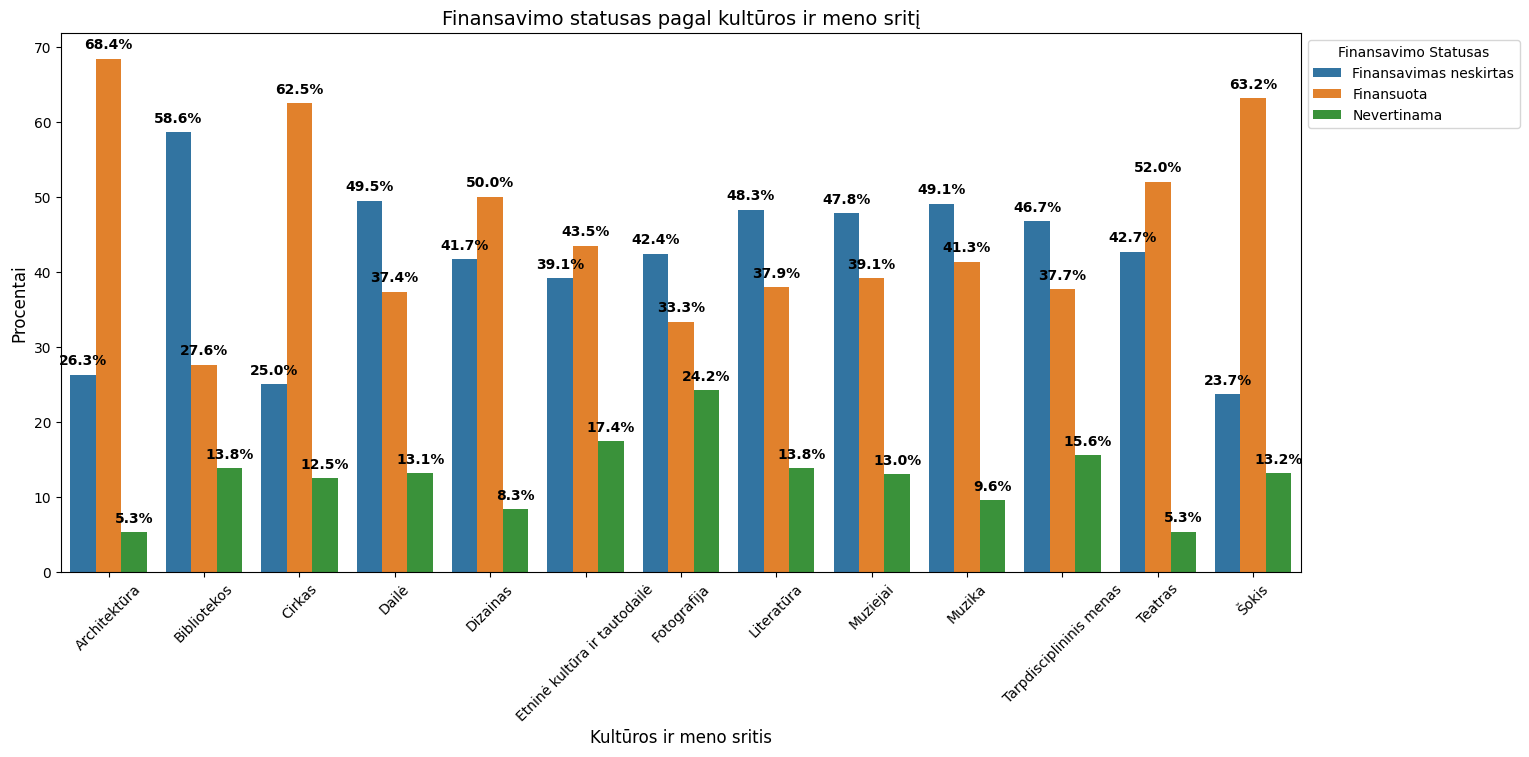

In [28]:
finansavimo_tendencijos = edukacines_mobilumo_stipendijos.groupby(['Kulturos_ir_meno_sritis', 'Finansavimo_statusas']).size().reset_index(name='count')

# Lentelė su procentais
total_counts = finansavimo_tendencijos.groupby('Kulturos_ir_meno_sritis')['count'].sum()
finansavimo_tendencijos['percentage'] = finansavimo_tendencijos.apply(lambda row: row['count'] / total_counts[row['Kulturos_ir_meno_sritis']] * 100, axis=1)

# Sukuriame Barplot su procentais
plt.figure(figsize=(16, 7))
ax = sns.barplot(x='Kulturos_ir_meno_sritis', y='percentage', hue='Finansavimo_statusas', data=finansavimo_tendencijos, dodge=True)

# Pridedame procentus ant stulpelių
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    try:
        # Tikriname, ar stulpelio aukštis didesnis už 0
        if p.get_height() > 0:
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='center', xytext=(0, 10),
                        textcoords='offset points', fontsize=10, color='black', fontweight='bold')
    except Exception as e:
        print("Error:", e, "Patch info:", p)

# Etiketės ir ašies formatavimas
plt.title('Finansavimo statusas pagal kultūros ir meno sritį', fontsize=14)
plt.xlabel('Kultūros ir meno sritis', fontsize=12)
plt.ylabel('Procentai', fontsize=12)
plt.legend(title='Finansavimo Statusas', loc='upper left', bbox_to_anchor=(1, 1))  # Perstumiu į kitą pusę
plt.xticks(rotation=45)
plt.show()

*

**Galima atlikti keletą įžvalgų pagal "Veiklos, kuriai(-ioms)prasoma skirti stipendija igyvendinimo forma(-os)“ reikšmes, kurios gal padės geriau suprasti edukacinių/mobilumo stipendijų paskirtį ir jų skirstymo tendencijas**

*

*Ką galima sužinoti:*

*1. kurios veiklos formos yra dažniausiai prašomos finansavimo;*

*2. kurios veiklos formos dažniausiai gauna finansavimą ir kurios ne;*

*3. kurios kultūros ir meno sritys labiausiai koncentruojasi į tam tikrą veiklą;*

*4-5. kokios sumos yra prašomos ir kokios skirriamos pagal įvairias veiklos formas.*

In [29]:
# Suskaidome stulpelio reikšmes pagal kabliataškį ir sukuriame sąrašą visų reikšmių
all_values = edukacines_mobilumo_stipendijos['Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_'].str.split('; ').explode()

# Surandame unikalias reikšmes
unique_values = all_values.unique()

# Surūšiuojame unikalias reikšmes
# unique_values = sorted(unique_values)

print(unique_values)

['KOMPETENCIJOS KĖLIMAS' '' 'TYRIMAI' 'KŪRYBA' 'VIEŠINIMAS'
 'PRISTATYMAS VISUOMENEI' 'EDUKACIJA' 'LEIDYBA' nan]


In [30]:
# 1. Dažniausiai prašomos veiklos formos

# Suskaičiuojame kiekvienos veiklos formos pasikartojimus
veiklos_formos_count = all_values.value_counts()
veiklos_formos_count

Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_
                          718
KOMPETENCIJOS KĖLIMAS     455
PRISTATYMAS VISUOMENEI    428
KŪRYBA                    246
EDUKACIJA                 228
TYRIMAI                   164
VIEŠINIMAS                 74
LEIDYBA                    37
Name: count, dtype: int64

In [31]:
# 2. Finansavimo sėkmė pagal veiklos formas

# Sukuriame naują stulpelį su atskiromis veiklos formomis
edukacines_mobilumo_stipendijos_exploded = edukacines_mobilumo_stipendijos.copy()
edukacines_mobilumo_stipendijos_exploded = edukacines_mobilumo_stipendijos_exploded.assign(
    veiklos_forma=edukacines_mobilumo_stipendijos_exploded['Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_'].str.split('; ')
).explode('veiklos_forma')

# Grupavimas pagal veiklos formą ir finansavimo statusą
veiklos_formos_finansavimas = edukacines_mobilumo_stipendijos_exploded.groupby(['veiklos_forma', 'Finansavimo_statusas']).size().unstack(fill_value=0)
# print(veiklos_formos_finansavimas)
veiklos_formos_finansavimas

Finansavimo_statusas,Finansavimas neskirtas,Finansuota,Nevertinama
veiklos_forma,,,
,321,310,87
EDUKACIJA,108,90,30
KOMPETENCIJOS KĖLIMAS,202,211,42
KŪRYBA,111,89,46
LEIDYBA,13,15,9
PRISTATYMAS VISUOMENEI,191,185,52
TYRIMAI,51,89,24
VIEŠINIMAS,29,35,10


In [32]:
# 3. Veiklos formų pasiskirstymas pagal kultūros ir meno sritis

# Grupavimas pagal kultūros ir meno sritį bei veiklos formą
veiklos_formos_meno_sritis = edukacines_mobilumo_stipendijos_exploded.groupby(['Kulturos_ir_meno_sritis', 'veiklos_forma']).size().unstack(fill_value=0)
# print(veiklos_formos_meno_sritis)
veiklos_formos_meno_sritis

veiklos_forma,,EDUKACIJA,KOMPETENCIJOS KĖLIMAS,KŪRYBA,LEIDYBA,PRISTATYMAS VISUOMENEI,TYRIMAI,VIEŠINIMAS
Kulturos_ir_meno_sritis,,,,,,,,
Architektūra,19,6,14,2,0,1,7,2
Bibliotekos,29,2,19,0,0,2,16,5
Cirkas,16,7,12,4,0,6,4,0
Dailė,99,32,60,53,8,93,13,12
Dizainas,48,19,30,24,0,35,21,6
Etninė kultūra ir tautodailė,23,13,13,4,3,11,12,5
Fotografija,33,10,14,13,1,32,4,7
Literatūra,29,8,14,7,7,23,13,5
Muziejai,23,6,12,1,0,10,10,3


In [33]:
# Prašomos ir skirtos sumos

edukacines_mobilumo_stipendijos_exploded = edukacines_mobilumo_stipendijos.copy()
edukacines_mobilumo_stipendijos_exploded = edukacines_mobilumo_stipendijos_exploded.assign(
    veiklos_forma=edukacines_mobilumo_stipendijos_exploded['Veiklos_(-u),_kuriai_(-ioms)_prasoma_skirti_stipendija_igyvendinimo_forma_(-os)_'].str.split('; ')
).explode('veiklos_forma')

# Grupavimas pagal veiklos formą ir prašomą sumą
veiklos_formos_suma = edukacines_mobilumo_stipendijos_exploded.groupby('veiklos_forma')['Prasoma_suma'].sum()

# Grupavimas pagal veiklos formą ir skirtą sumą
veiklos_formos_skirtos_suma = edukacines_mobilumo_stipendijos_exploded.groupby('veiklos_forma')['Skirta_suma'].sum()

# Sujungiame duomenis į vieną lentelę
veiklos_formos_sumos = pd.concat([veiklos_formos_suma, veiklos_formos_skirtos_suma], axis=1).reset_index()

# Pervadiname stulpelius
veiklos_formos_sumos.columns = ['Veiklos forma', 'Prašoma suma', 'Skirta suma']

# Rūšiavimas pagal viso prašomą sumą mažėjančia tvarka
veiklos_formos_sumos = veiklos_formos_sumos.sort_values(by='Prašoma suma', ascending=False)

veiklos_formos_sumos

,Veiklos forma,Prašoma suma,Skirta suma
0,,1994836.77,677534.6
2,KOMPETENCIJOS KĖLIMAS,1338811.96,480426.0
5,PRISTATYMAS VISUOMENEI,1269783.44,442008.0
3,KŪRYBA,803871.09,237693.0
1,EDUKACIJA,619539.20,196777.0
6,TYRIMAI,435079.53,186554.6
7,VIEŠINIMAS,224059.29,79547.0
4,LEIDYBA,112695.00,41739.0


###1.2

Kokias pagrindines problemas, susijusias su edukacinių / mobilumo stipendijų finansavimu, iš pateiktų duomenų ir atliktos analizės identifikuojate?

*Matyti, kad kai kurių meno sričių tokių kaip muzika ar tarpdisciplininis menas paraiškų kiekis didesnis už kitus ir gerokai attrūkęs nuo vidurkio.
Tuo tarpu architektūra, literatūra, cirkas - sulaukia gerokai mažiau paraiškų.
Dailė, teatras, dizainas, šokis - išlaiko vidutinį kiekį.
Tokią didelę atskirti galima būtų bandyti paaiškinti šių sričiu ribotu finansavimu*

*Tačiau kitas grafikas - finansavimo statusą pagal kultūros ir meno sritį - tai paneigia.*

*Muzika ir tarpdisciplininis menas, nors ir sulaukia daugiausia dėmesio, turi gana aukštą nefinansuotų paraiškų procentą (49,1% ir 52,0% atitinkamai) - Galimai tai dėl to, kad didėjant paraiškų kiekiui - didėja ir nekokybiškų ar netinkamų paraiškų skaičius*

*Kai kurios sritys, kaip teatras ir cirkas, turi didelį procentą nevertinamų paraiškų (23,7% ir 25,0% atitinkamai). Tai rodo, kad šiose srityse gali būti problemų su paraiškų vertinimo procesais arba su jų tinkamumu finansavimui. Tačiau šios sritys turi ir didelį patvirtintų paraiškų skaičių (52% ir 62,5% atitinkamai) kas galimai reiškia, kad nepopuliarus ir nišinis menas labiau propaguojamas*

### 1.3

*Savivaldybių finansavimo pasiskirstymas.*

*Galima atsižvelgti į savivaldybių pasiskirstymą. Reikėtų išsiaiškinti, ar yra savivaldybių, kuriuose paraiškų skaičius ir finansavimo gavimo rodikliai yra labai skirtingi palyginus su kitomis.*

*Tai gali parodyti, kad kai kurios savivaldybės nera pakankamai finansuojamos, kas galėtų reikšti poreikį gerinti paraiškų rengimo kokybę/kiekybę jose.*

In [34]:
cross_tab_region = pd.crosstab(edukacines_mobilumo_stipendijos['Savivaldybe'], edukacines_mobilumo_stipendijos['Finansavimo_statusas'])
# NaN į 0, jei tokie stulpeliai yra
cross_tab_region = cross_tab_region.fillna(0)

cross_tab_region

Finansavimo_statusas,Finansavimas neskirtas,Finansuota,Nevertinama
Savivaldybe,,,
Akmenės rajono savivaldybė,0,0,1
Alytaus miesto savivaldybė,4,3,0
Anykščių rajono savivaldybė,2,2,0
Biržų rajono savivaldybė,1,0,0
Druskininkų savivaldybė,0,1,0
Elektrėnų savivaldybė,1,0,0
Jonavos rajono savivaldybė,1,1,1
Joniškio rajono savivaldybė,1,0,0
Jurbarko rajono savivaldybė,1,0,0


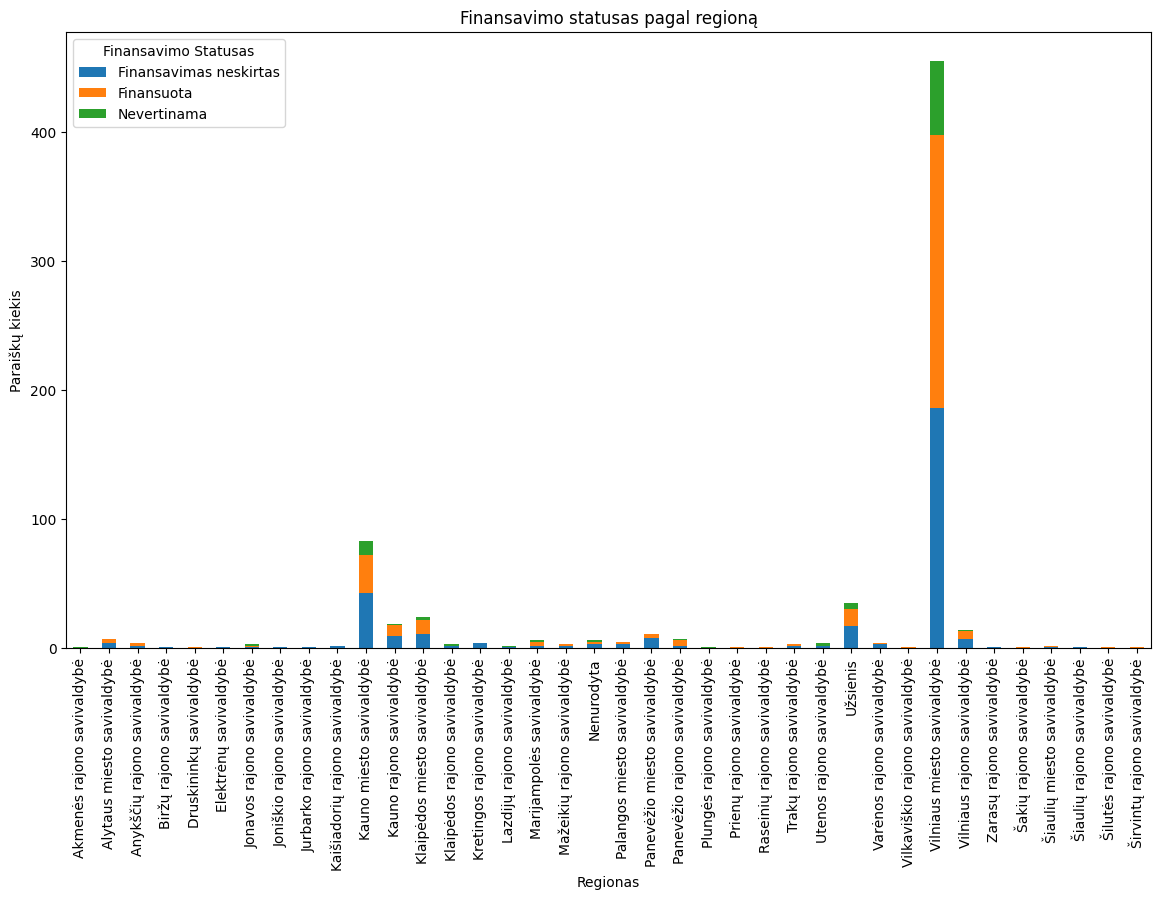

In [35]:
# Vizualizuoju
cross_tab_region.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Finansavimo statusas pagal regioną')
plt.xlabel('Regionas')
plt.ylabel('Paraiškų kiekis')
plt.legend(title='Finansavimo Statusas')
plt.show()


*Prašomų ir skirtų sumų santykis:*

*Ar dažnai prašomos sumos yra mažesnės ar didesnės už skirtas sumas. Tai gali parodyti, ar paraiškų teikėjai realiai įvertina savo projektų biudžetus ir ar finansavimo institucijos geba patenkinti pateiktų projektų poreikius.*

*Tai gali parodyti ar paraiškų teikėjai turi pagristus lūkesčius dėl galimo finansavimo.*

In [36]:
# Prašomų ir skirtų sumų santykio analizė ir jos poveikis menininkų projektų įgyvendinimui.

# Skaičiuojame prašomų ir skirtų sumų vidurkius pagal kultūros ir meno sritį
sums_by_field = edukacines_mobilumo_stipendijos.groupby('Kulturos_ir_meno_sritis')[['Prasoma_suma', 'Skirta_suma']].mean().reset_index()

sums_by_field


,Kulturos_ir_meno_sritis,Prasoma_suma,Skirta_suma
0,Architektūra,2492.404737,1969.000000
1,Bibliotekos,2109.241379,1023.750000
2,Cirkas,2723.875000,1898.900000
3,Dailė,3104.529091,2593.448649
4,Dizainas,3106.259167,2339.666667
5,Etninė kultūra ir tautodailė,2686.000435,2166.900000
6,Fotografija,3492.030303,2750.272727
7,Literatūra,2239.305172,2032.818182
8,Muziejai,1998.347826,1429.555556
9,Muzika,2560.507365,1790.608696


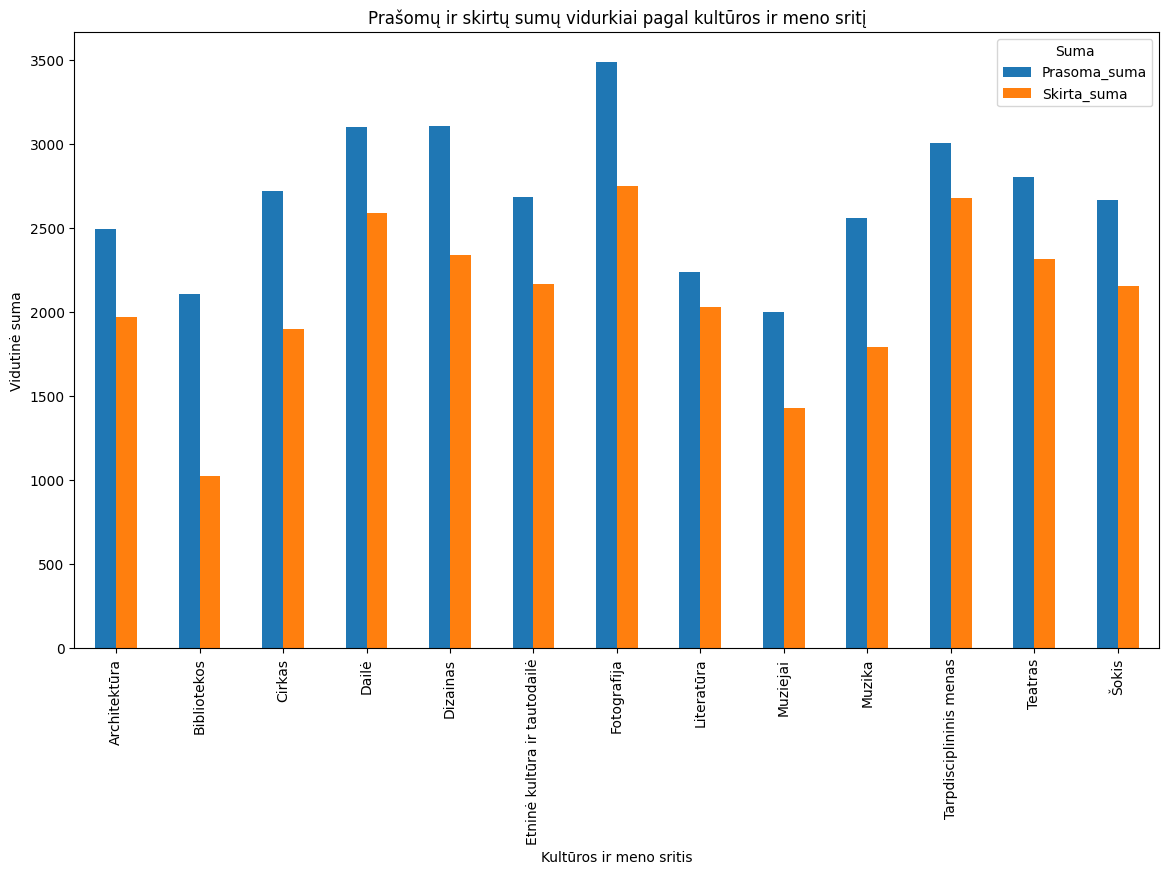

In [37]:
# Vizualizuoju
sums_by_field.plot(kind='bar', x='Kulturos_ir_meno_sritis', figsize=(14, 8))
plt.title('Prašomų ir skirtų sumų vidurkiai pagal kultūros ir meno sritį')
plt.xlabel('Kultūros ir meno sritis')
plt.ylabel('Vidutinė suma')
plt.legend(title='Suma')
plt.show()

In [38]:
# Lentelė pagal savivaldybę, prašomą sumą ir skirtą sumą

cross_tab_sumos = edukacines_mobilumo_stipendijos.groupby('Savivaldybe').agg({
    'Prasoma_suma': 'sum',
    'Skirta_suma': 'sum'
}).reset_index()

# print(cross_tab_sumos)
cross_tab_sumos

# cross_tab_sumos.to_excel('savivaldybe_prasoma_skirta_suma.xlsx', index=False)

,Savivaldybe,Prasoma_suma,Skirta_suma
0,Akmenės rajono savivaldybė,980.00,0.0
1,Alytaus miesto savivaldybė,14610.00,5175.0
2,Anykščių rajono savivaldybė,5829.00,1200.0
3,Biržų rajono savivaldybė,916.00,0.0
4,Druskininkų savivaldybė,4800.00,1533.0
5,Elektrėnų savivaldybė,1500.00,0.0
6,Jonavos rajono savivaldybė,10128.00,3600.0
7,Joniškio rajono savivaldybė,3600.00,0.0
8,Jurbarko rajono savivaldybė,1934.00,0.0
9,Kaišiadorių rajono savivaldybė,7690.91,0.0


In [39]:
# Lentelė pagal savivaldybe ir finansavimo statusą


cross_tab_region = pd.crosstab(edukacines_mobilumo_stipendijos['Savivaldybe'], edukacines_mobilumo_stipendijos['Finansavimo_statusas'])

cross_tab_region = cross_tab_region.fillna(0)

# Sukuriame kryžminę lentelę pagal savivaldybę, prašomą sumą ir skirtą sumą
cross_tab_sumos = edukacines_mobilumo_stipendijos.groupby('Savivaldybe').agg({
    'Prasoma_suma': 'sum',
    'Skirta_suma': 'sum'
}).reset_index()

# Sujungiame abi lenteles pagal savivaldybę
final_table = cross_tab_region.merge(cross_tab_sumos, on='Savivaldybe')

# Perkeliame 'Savivaldybe' stulpelį į pradžią
final_table = final_table.set_index('Savivaldybe').reset_index()

final_table

# final_table.to_excel('savivaldybe_finansavimo_apzvalga.xlsx', index=False)


,Savivaldybe,Finansavimas neskirtas,Finansuota,Nevertinama,Prasoma_suma,Skirta_suma
0,Akmenės rajono savivaldybė,0,0,1,980.00,0.0
1,Alytaus miesto savivaldybė,4,3,0,14610.00,5175.0
2,Anykščių rajono savivaldybė,2,2,0,5829.00,1200.0
3,Biržų rajono savivaldybė,1,0,0,916.00,0.0
4,Druskininkų savivaldybė,0,1,0,4800.00,1533.0
5,Elektrėnų savivaldybė,1,0,0,1500.00,0.0
6,Jonavos rajono savivaldybė,1,1,1,10128.00,3600.0
7,Joniškio rajono savivaldybė,1,0,0,3600.00,0.0
8,Jurbarko rajono savivaldybė,1,0,0,1934.00,0.0
9,Kaišiadorių rajono savivaldybė,2,0,0,7690.91,0.0


## 2 UŽDUOTIS

### 0

Naudodamiesi pateiktu apklausos duomenų failu Kultura_w_datamap.xlsx, apskaičiuokite, kokia respondentų dalis nuo visų respondentų lankėsi literatūriniuose skaitymuose, knygų pristatymuose, dainuojamosios poezijos ar bardų koncerte kiekvienoje apskrityje (įskaitant apskričių centrus), jeigu:

S6_2 – klausimas, ar asmuo lankėsi literatūriniuose skaitymuose, knygų pristatymuose, dainuojamosios poezijos ar bardų koncerte;
* W – kiekvienam respondentui suteiktas svoris;
* X4 – respondento apskritis.
* Bendrai, visų apsilankiusių literatūriniuose skaitymuose, knygų pristatymuose, dainuojamosios poezijos ar bardų koncerte dalis yra 13,98 %.




In [40]:
pagrindiniai_duoemnys_2 = pd.read_excel("LKT_Kultura_w_datamap.xlsx")

pd.set_option('display.max_columns', None)
pagrindiniai_duoemnys_2.head(3)

,ID,W,data,D1,X1,X2,X3,X4,D3,D4,D4R,D5,D5R,D6,D6R,D7,D8,D78,D9,D10,D10R,D11,D11R,D12,D12R,D13,D13R,D14,G1,G2,G3,G4,G5,S1_1,S1_2,S1_3,S1_4,S1_5,S1_6,S1_7,S2_1,S2_2,S2_3,S2_4,S2_5,S2_6,S2_7,S3,S4_1,S4_2,S5,S6_1,S6_2,S6_3,S6_4,S6_5,S6_6,S6_7,S6_8,S6_9,S6_10,S7_1,S7_2,S7_3,S7_4,S7_5,S7_6,S7_7,S7_8,S7_9,S7_10,S8,S9_1,S9_2,S9_3,S9_4,S9_5,S9_6,S10_1,S10_2,S10_3,S10_4,S10_5,S10_6,S10_7,S10_8,S10_9,S10_10,S11_1,S11_2,S11_3,S11_4,S11_5,S11_6,S11_7,S11_8,S11_9,S11_10,S12_1,S12_2,S12_3,S12_4,S12_5,S12_6,S12_7,S12_8,S12_9,S12_10,S13_1,S13_2,S13_3,S13_4,S13_5,S13_6,S13_7,S13_8,S13_9,S13_10,A1_1,A1_2,A1_3,A1_4,A1_5,A2_1,A2_2,A2_3,A2_4,A2_5,A3,A4_1,A4_2,A5,A6_1,A6_2,A7,A8_1,A8_2,A8_3,A8_4,A8_5,A8_6,A8_7,A8_8,A9_1,A9_2,A9_3,A9_4,A9_5,A9_6,A9_7,A9_8,P1_1,P1_2,P2_1,P2_2,P3,P4_1,P4_2,P4_3,P5,P6_1,P6_2,P6_3,P7_1,P7_2,P7_3,P7_4,P7_5,P7_6,P7_7,P7_8,P8_1,P8_2,P8_3,P8_4,P8_5,P8_6,P8_7,P8_8,P9,P10_1,P10_2,P11_1,P11_2,P11_3,P11_4,P11_5,P11_6,P12_1,P12_2,P12_3,P12_4,P12_5,P12_6,P13_1,P13_2,P13_3,P14_1,P14_2,P14_3,P15,P16_1,P16_2,P16_3,P16_4,P16_5,P16_6,P16_7,P17,R1_1,R1_2,R1_3,R2_1,R2_2,R2_3,R3,R4_1,R4_2,R5,K1_1,K1_2,K1_3,K1_4,K2_1,K2_2,K2_3,K2_4,K3,K4_1,K4_2,K4_3,K5,K6,K7_1,K7_2,K8_1,K8_2,K8_3,K8_4,K9,K10,K11,K10K11,K12,K10R,K11R,K10K11R,K12R,K13_1,K13_2,K13_3,K13_4,K13_5,K13_6,K13_7,K13_9,K13_10,q20_8_other,K14_1,K14_2,B1_1,B1_2,B1_3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_6,B2_7,B2_8,B2_9,B3,B4_1,B4_2,F1_1,F1_2,F2_1,F2_2,F3,F4_1,F4_2,F5,F6_1,F6_2,F6_3,F7_1,F7_2,F8,F9_1,F9_2,F9_3,M1,M2,M3,M4,M5_1,M5_2,M5_3,M5_4,M5_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_1_5,Q2_1_6,Q2_1_7,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_2_5,Q2_2_6,Q2_2_7,Q2_3_1,Q2_3_2,Q2_3_3,Q2_3_4,Q2_3_5,Q2_3_6,Q2_3_7,Q2_4_1,Q2_4_2,Q2_4_3,Q2_4_4,Q2_4_5,Q2_4_6,Q2_4_7,Q2_5_1,Q2_5_2,Q2_5_3,Q2_5_4,Q2_5_5,Q2_5_6,Q2_5_7,Q2_6_1,Q2_6_2,Q2_6_3,Q2_6_4,Q2_6_5,Q2_6_6,Q2_6_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q5_8,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q9_8,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q15,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,SA1,SA2,SA3,SA3R,SA3o,SA4o,SA4,SA5,SA6,SA7,SA8,SA9,SA10,SA11,SA12_1,SA12_2,SA12_3,SA12_4,SA12_5,SA12_6,SA12_7,SA12_8,SA12_9,SA12_10,SA12_11,SA12_other,SA13,SA14,SA15_1,SA15_2,SA15_3,SA15_4,SA15_5,SA15_6,SA15_7,SA15_9,SA16,SA17,SA18,SA19,SA20,SA21,SA22,SA23,RR1A_1,RR1A_2,RR1A_3,RR1A_4,RR1A_5,RR1A_6,RR1A_7,RR1A_8,RR1A,RR1B_1,RR1B_2,RR1B_3,RR1B_4,RR1B_5,RR1B_6,RR1B_7,RR1B_8,RR1B,RR1,RR1A_CT4,RR1B_CT4,RR1_CT4,RR1_CT4F,RR2A_1,RR2A_2,RR2A_3,RR2A_4,RR2A_5,RR2A_6,RR2A_7,RR2A_8,RR2A,RR2B_1,RR2B_2,RR2B_3,RR2B_4,RR2B_5,RR2B_6,RR2B_7,RR2B_8,RR2B,RR2,RR2A_CT4,RR2B_CT4,RR2_CT4,RR2_CT4F,RR3_1,RR3_2,RR3_3,RR3_4,RR3_5,RR3_6,RR3_7,RR3_8,RR3,RR4_1,RR4_2,RR4_3,RR4_4,RR4_5,RR4_6,RR4,RR5_1,RR5_2,RR5_3,RR5_4,RR5_5,RR5_6,RR5,RR6,RR7_1,RR7_2,RR7_3,RR7_4,RR7_5,RR7_6,RR7_7,RR7_8,RR7_9,RR7_10,RR7_11,RR7,RR8_1,RR8_2,RR8_3,RR8,RR9,RR10,RR11,RR12,RR13,RR14,RR15,RR16,RR17_1_1,RR17_1_2,RR17_2_1,RR17_2_2,RR17_3_1,RR17_3_2,RR17_4_1,RR17_4_2,RR17_5_1,RR17_5_2,RR17_6_1,RR17_6_2,RR17_7_1,RR17_7_2,RR17_8_1,RR17_8_2,RR17_9_1,RR17_9_2,RR18_1_1,RR18_1_2,RR18_2_1,RR18_2_2,RR18_3_1,RR18_3_2,RR18_4_1,RR18_4_2,RR18_5_1,RR18_5_2,RR18_6_1,RR18_6_2,RR18_7_1,RR18_7_2,RR18_8_1,RR18_8_2,RR18_9_1,RR18_9_2,NN1,NN2,NN3,NN4,NN5,NN6,NN7,NN8,NN9,Q9COUNT,Q13COUNT,Q9COUNT8,Q13COUNT8
0,1,0.942935,7/20/2023,1,2,2.0,NaN,2,1,19,1,1,1,2,1,9,NaN,2,2,3,3,5,4,0,0,99,99,1,5,5,5.0,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,2.0,5,4,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,2,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,2,2,2,2,2,2,2,2,2,2,8,8,8,8,8,8,8,8,8,8,2,2,2,2,2,8,8,8,8,8,2.0,5,5,3,2,2,2.0,2,2,2,2,9,2,2,2,8,8,8,8,9,8,8,8,2,2,8,8,2.0,2,2,2,2.0,4,9,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [41]:
# Pasirenkame tik reikalingus stulpelius
reikalingi_atributai = ['S6_2', 'W', 'X4']
apskriciu_df = pagrindiniai_duoemnys_2[reikalingi_atributai]

# Patikriname duomenų struktūrą
apskriciu_df.head(3)

,S6_2,W,X4
0,2,0.942935,2
1,2,0.921525,7
2,2,0.864752,8


In [42]:
# Patikriname, ar yra trūkstamų reikšmių
apskriciu_df = apskriciu_df.dropna()

# Patikriname unikalių reikšmių kiekviename stulpelyje
print(apskriciu_df['S6_2'].unique())

[2 1]


In [43]:
# Filtruojame duomenis, kad gautume tik tuos, kurie lankėsi renginiuose
lankesi_renginiuose = apskriciu_df[apskriciu_df['S6_2'] == 1]

# Apskaičiuojame bendrą svorį
viso_weight = apskriciu_df['W'].sum()

# Apskaičiuojame svorį tiems, kurie lankėsi renginiuose
lankesi_renginiuose_weight = lankesi_renginiuose['W'].sum()

# Apskaičiuojame bendrą lankymosi procentą
viso_procentai = (lankesi_renginiuose_weight / viso_weight) * 100
print(f'Bendras lankymosi procentas: {viso_procentai:.2f}%')


Bendras lankymosi procentas: 13.98%


### 2.1

In [44]:
# Žodynas su apskričių pavadinimais
apskriciu_pavadinimai = {
    1: 'Vilniaus apskritis',
    2: 'Kauno apskritis',
    3: 'Klaipėdos apskritis',
    4: 'Šiaulių apskritis',
    5: 'Panevėžio apskritis',
    6: 'Alytaus apskritis',
    7: 'Marijampolės apskritis',
    8: 'Telšių apskritis',
    9: 'Utenos apskritis',
    10: 'Tauragės apskritis'
}

In [45]:
# Grupavimas pagal apskritį ir apskaičiavimas procentų
# Lankymosi procentas = ((Lankytojų svoris apskrityje) / (Bendras svoris apskrityje)) * 100

apskritis_percentage = lankesi_renginiuose.groupby('X4')['W'].sum() / apskriciu_df.groupby('X4')['W'].sum() * 100
apskritis_percentage = apskritis_percentage.reset_index().rename(columns={'W': 'Lankymosi procentas'})

# Pakeičiame apskričių numerius pavadinimais
apskritis_percentage['X4'] = apskritis_percentage['X4'].map(apskriciu_pavadinimai)

# Pervadiname stulpelį X4 į Apskritis
apskritis_percentage = apskritis_percentage.rename(columns={'X4': 'Apskritis'})

apskritis_percentage

,Apskritis,Lankymosi procentas
0,Vilniaus apskritis,10.664572
1,Kauno apskritis,16.206485
2,Klaipėdos apskritis,10.277195
3,Šiaulių apskritis,14.219430
4,Panevėžio apskritis,15.920568
5,Alytaus apskritis,24.042394
6,Marijampolės apskritis,9.649549
7,Telšių apskritis,15.968511
8,Utenos apskritis,19.993385
9,Tauragės apskritis,16.411964


Kategoriniams naudojame proporcijas, santykius ir procentuotes - kitaip - kokybinę analizę (https://unstats.un.org/wiki/display/genderstatmanual/Measures+of+composition+or+distribution+for+qualitative+variables)

Kiekybiniams naudojame išskirtis, medianas, kvartilius - kitaip - statistinę analizę (https://unstats.un.org/wiki/display/genderstatmanual/Measures+of+composition+or+distribution+for+quantitative+variables)